# Example: Step counting

In this example, you are given a number of sample sensor logs and you are asked to write an algorithm to count the number of steps. The different logs correspond to different sensor placements (left pocket, right pocket, wrist), and to different walking patterns (e.g. with delays between short burst of steps). The title of each log says how many steps are present; try to get reasonably close to this number.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
from scipy.signal import find_peaks
import glob
import re
matplotlib.style.use('ggplot')
%matplotlib inline

## Using find_peaks to Detect Steps

The `find_peaks` function from scipy.signal can be used to detect peaks and valleys in timeseries data. Some key parameters:

- `prominence` - Required height of peaks. Higher values find more prominent peaks.
- `width` - Required width of peaks in number of samples. Higher values find broader peaks.
- `distance` - Minimum distance between peaks. Can avoid detecting too many peaks.

For detecting steps from accelerometer data:
- A higher `prominence` helps avoid false detections from noise.
- An appropriate `width` matches the typical step duration.
- `distance` can be adjusted to limit detected steps to a normal human pace.

Tuning these parameters is important to accurately detect steps without too many false positives or negatives. The detected peaks can then be counted to determine number of steps.

In [2]:
files = glob.glob('data/Steps-Logs/*.csv')
for f in files:
    print(f)

data/Steps-Logs/D8_righthoodiepocket.csv
data/Steps-Logs/D2_leftwrist_slow.csv
data/Steps-Logs/D3_leftwrist.csv
data/Steps-Logs/D9_rightpocket_slow.csv
data/Steps-Logs/D6_leftwrist3_slow.csv
data/Steps-Logs/D5_leftwrist2_slow.csv
data/Steps-Logs/D1_lefthoodiepocket.csv
data/Steps-Logs/D4_leftwrist_3hops_3halfspin_3touchceiling_thenshake.csv
data/Steps-Logs/D7_righthoodiepocket_slow.csv


In [3]:
files = glob.glob('data/Steps-Logs/*.csv')

results = []

# set prominence and width parameters
prom=0.5
wid=15

for f in files:

    # Load data
    df = pd.read_csv(f, index_col='time', parse_dates=True)  
    
    # Detect peaks
    peaks, _ = find_peaks(df['accel_mag'], prominence=prom, width=wid)
    num_steps = len(peaks)
    
    # Parse filename to extract ID
    match = re.search(r'D(\d+)', f)
    id = match.group(1)
    
    # Get ground truth
    actual_steps = 45
        
    # Calculate accuracy       
    accuracy = num_steps/actual_steps*100
    
    # Store results 
    results.append([id, actual_steps, num_steps, accuracy])
    
# Print table   
print("{:>10}  {:>10}  {:>10}  {:>10}".format('ID', 'Actual', 'Detected', 'Accuracy'))
for row in results:
    print("{:>10}  {:>10}  {:>10}  {:>10.2f}".format(*row))

        ID      Actual    Detected    Accuracy
         8          45         225      500.00
         2          45           2        4.44
         3          45         237      526.67
         9          45           5       11.11
         6          45           6       13.33
         5          45           6       13.33
         1          45         202      448.89
         4          45         293      651.11
         7          45           2        4.44


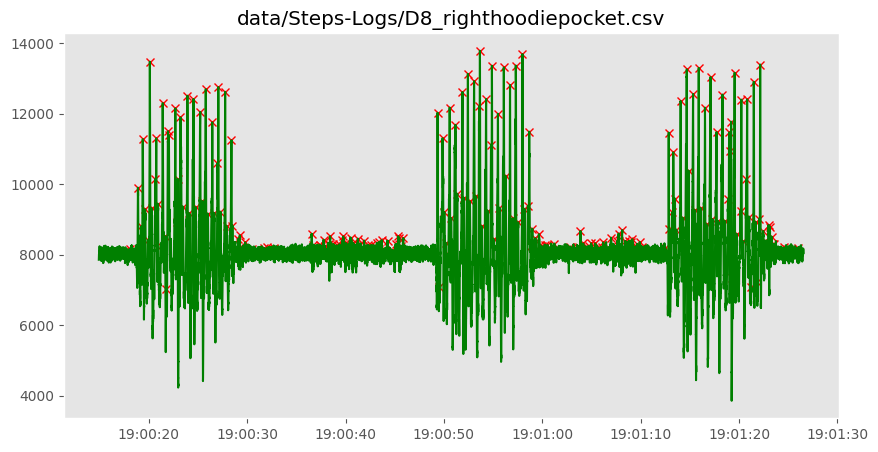

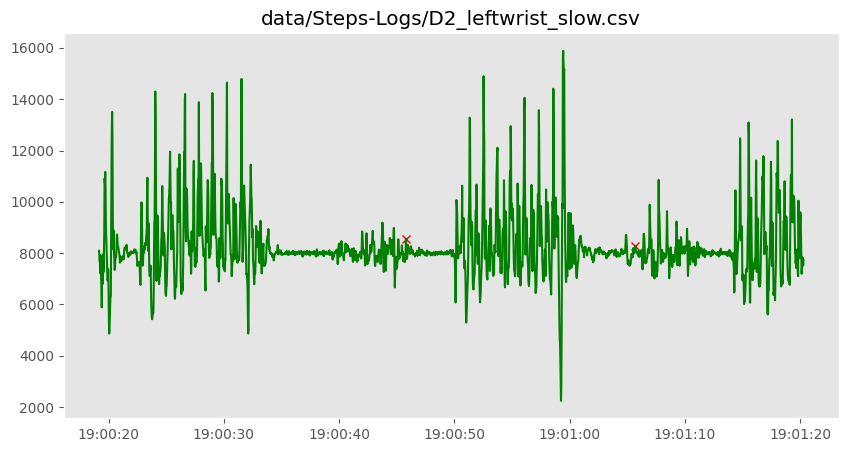

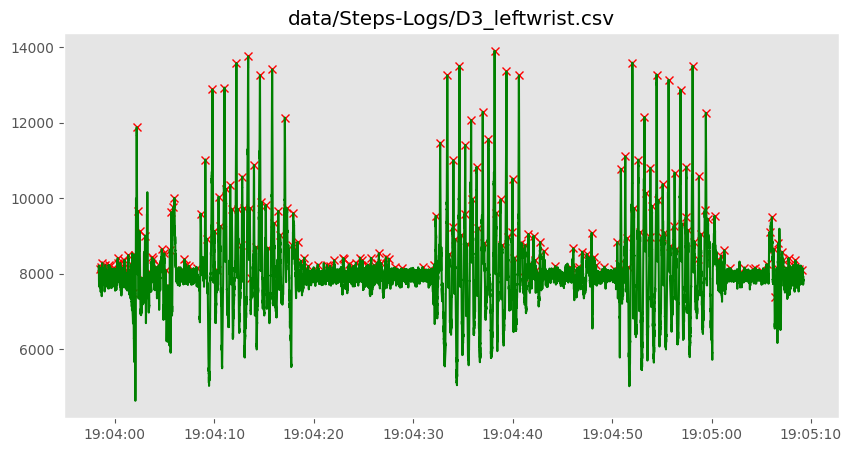

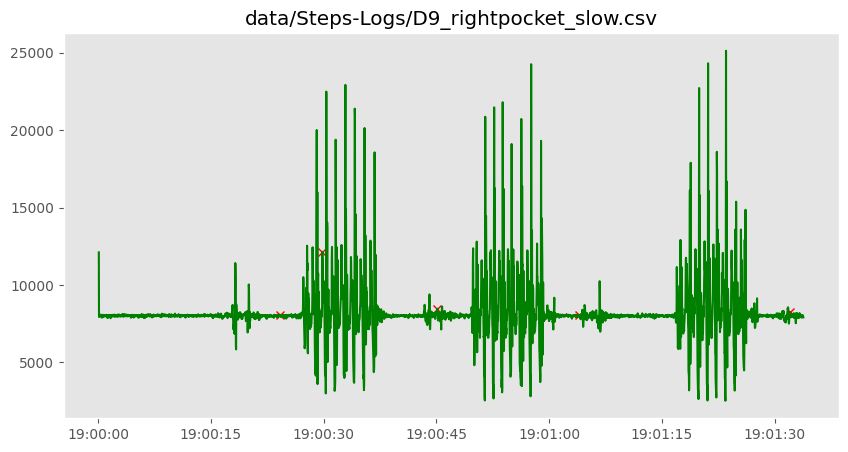

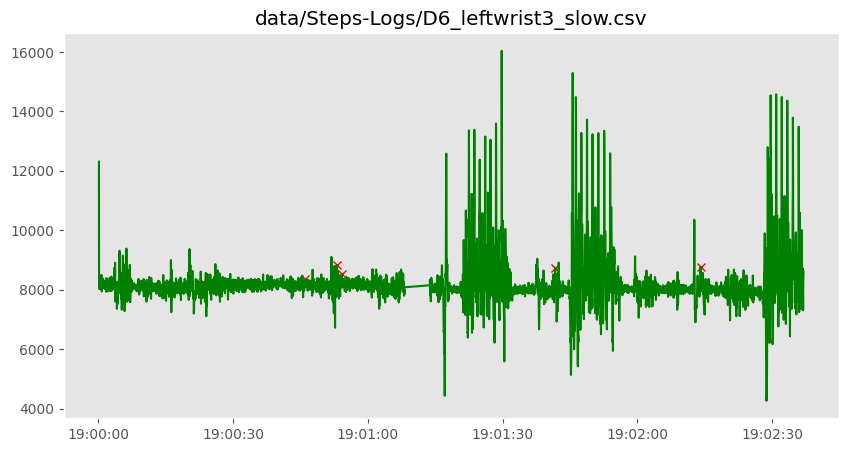

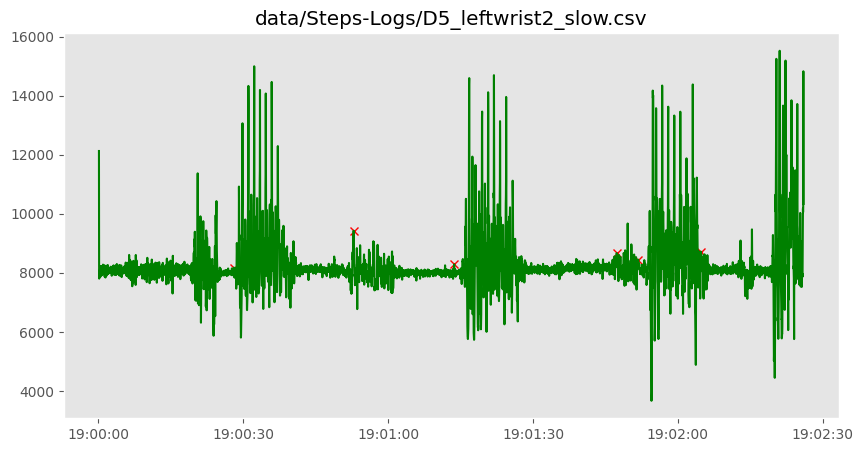

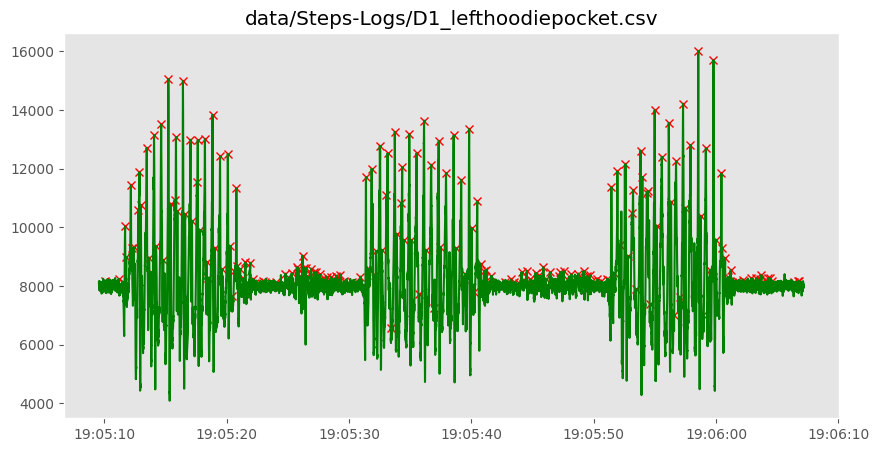

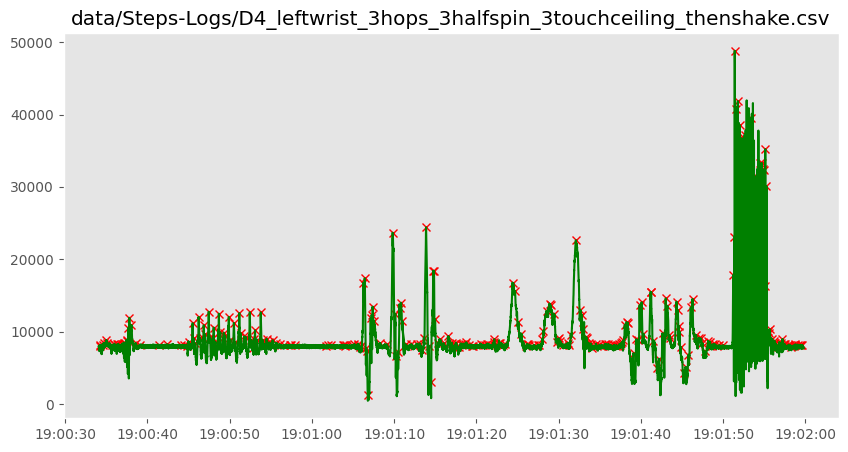

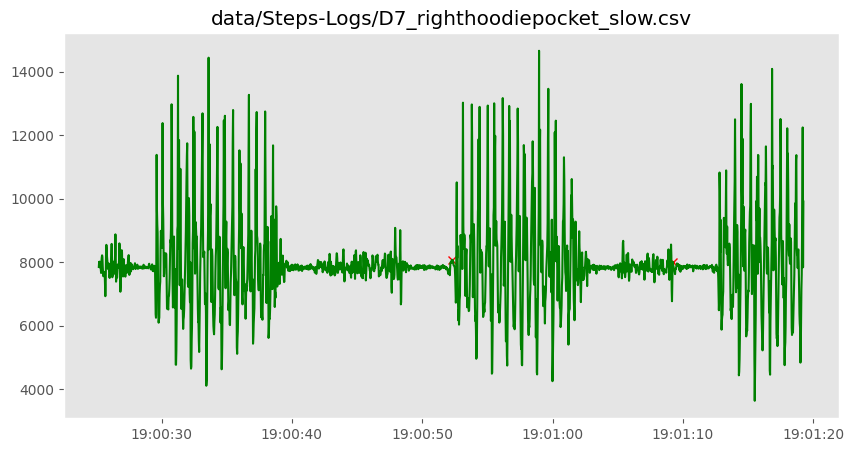

In [4]:
# Load data and detect peaks
files_to_plot = glob.glob('data/Steps-Logs/D*.csv')

for i, f in enumerate(files_to_plot):
    df = pd.read_csv(f, index_col='time', parse_dates=True)  
    
    # Step counting algorithm
    peaks_indices = find_peaks(df['accel_mag'], prominence=prom, width=wid)[0]
    peaks = df['accel_mag'][peaks_indices]

    # Plot the signal and mark the points where your algorithm detects steps
    plt.figure(figsize=(10,5))

    time_axis = df.index[peaks_indices]

    pl.plot(time_axis, peaks, 'rx')
    pl.plot(df.index, df['accel_mag'], 'g-', label = 'filtered')
    plt.title(f)
    plt.grid()
    plt.show()
